## Pussy Gift. BOOT, ATOM, OSMO, LUNA, HUAHUA, JUNO, DSM, STARS, UMEE, GRAV and EVMOS Analysis

In [1]:
import pandas as pd
import numpy as np
from math import log10, floor
from typing import Optional
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.core.display import display, HTML

from src.extractor_cosmos_sdk_snapshots import get_balances
from src.utils_charts import grade_boundaries_analysis

In [2]:
TOTAL_GIFT_SIZE = 95e16
GIFT_PER_SEGMENT = {
    'Bostrom': 10e16,
    'Desmos': 10e16
}
INITIAL_BOUNDARY_DICT = {
    'atom': 0.1,
    'luna': 1,
    'osmo': 1,
    'huahua': 10_000,
    'boot': 10_000,
    'dsm': 30,
    'juno': 0.5,
    'stars': 20,
    'umee': 100,
    'graviton': 100,
    'evmos': 2
}

In [3]:
def set_grade(x: float, boundaries: list) -> Optional[int]:
    if x > boundaries[2]:
        return int(3)
    elif x > boundaries[1]:
        return int(2)
    elif x > boundaries[0]:
        return int(1)
    return None


def analyze_chain(snapshot_url: str,
                  coin: str,
                  coin_for_display: str,
                  initial_boundary: float,
                  max_show_value: int,
                  segment: str,
                  decimals: int = 6,
                  value_transform_func=lambda x: log10(x) if x >= 0.1 else -1.8,
                  balances_items=None) -> [pd.DataFrame, list]:
    if balances_items is None:
        balances_items = ['delegated']
    # if initial_boundary < 1:
    #     rounded_function = lambda x: floor(10 ** (round(log10(x), 2)) * 10) / 10 if x > 0.1 else 0.05
    # else:
    # rounded_function = None

    _balances_df = get_balances(snapshot_url=snapshot_url, coin=coin, decimals=decimals,
                                balances_items=balances_items)  #,
    # rounded_function=rounded_function)

    _balances_agg_df = _balances_df.groupby('balance_coin').agg(
        number_of_addresses=('address', np.count_nonzero),
        balance_coin_rounded=('balance_coin_rounded', np.max)).reset_index()

    _boundaries = grade_boundaries_analysis(
        distribution_df=_balances_agg_df,
        value_column='balance_coin',
        chart_value_column='balance_coin_rounded',
        address_column='number_of_addresses',
        address_chart_label='Number of Addresses, log10',
        value_chart_label=f'{coin_for_display} Balance, log10',
        value_name=f'{coin_for_display} Balance',
        value_transform_func=value_transform_func,
        chart_title=f'Distribution of {coin_for_display} Balances by Addresses',
        max_show_value=max_show_value,
        initial_boundary=initial_boundary,
        level_line_shift=0,
        boundary_round=0)

    _balances_df.loc[:, 'grade'] = _balances_df['balance_coin'].map(
        lambda x: set_grade(x, boundaries=_boundaries))
    _balances_df.loc[:, 'segment'] = segment

    return _balances_df, _boundaries

### Get Snapshots
- Bostrom
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 4,939,850 block.
- Chihuahua
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 4,890,535 block.
- Cosmoshub
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 12,948,921 block.
- Desmos
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 6,121,401 block.
- Evmos
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 7,682,206 block.
- Gravity
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 4,684,716 block.
- Juno
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 5,837,080 block.
- Osmosis
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 7,025,000 block.
- Stargaze
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 5,720,382 block.
- Terra
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 2,544,937 block.
- Umee
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 3,984,825 block.

### Analysis of Grade Boundaries. HUAHUA Owners
HUAHUA balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"10,000 < HUAHUA Balance <= 1,805,215","19,627",89.0
2,"1,805,215 < HUAHUA Balance <= 25,590,943","2,205",10.0
3,"25,590,943 < HUAHUA Balance",222,1.0


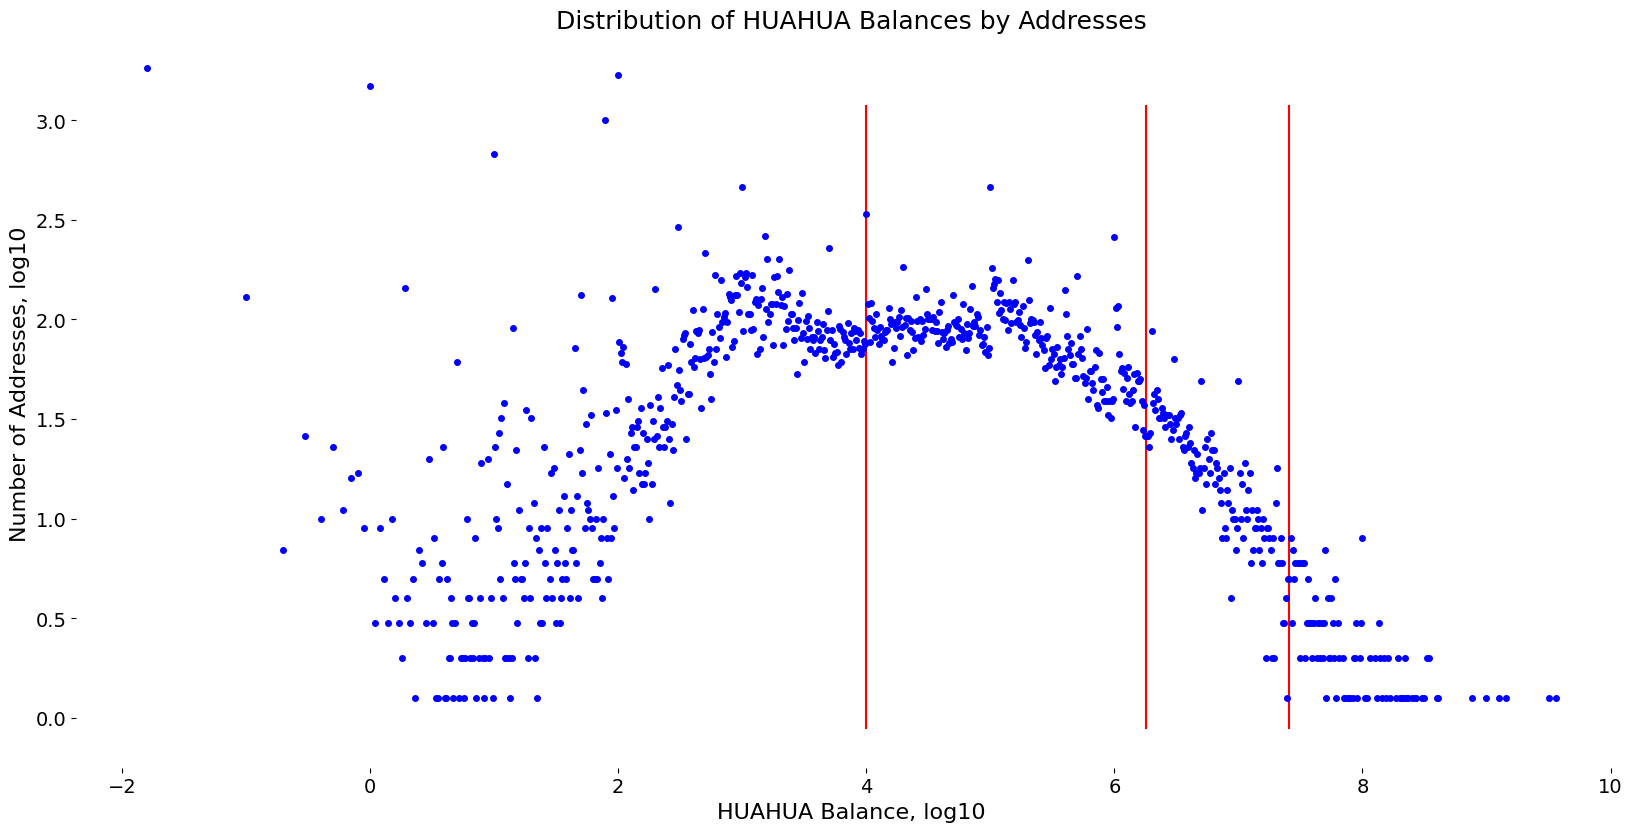

In [4]:
huahua_balances_df, huahua_boundaries = analyze_chain(
    snapshot_url="data/pussy/chihuahua_4890535.json",
    coin='uhuahua',
    coin_for_display='HUAHUA',
    initial_boundary=INITIAL_BOUNDARY_DICT['huahua'],
    max_show_value=10_000_000_000,
    segment='ChiHuaHua')

### Analysis of Grade Boundaries. BOOT Owners
BOOT balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"10,000 < BOOT Balance <= 1,383,480,819","6,256",89.0
2,"1,383,480,819 < BOOT Balance <= 144,305,883,038",702,10.0
3,"144,305,883,038 < BOOT Balance",71,1.0


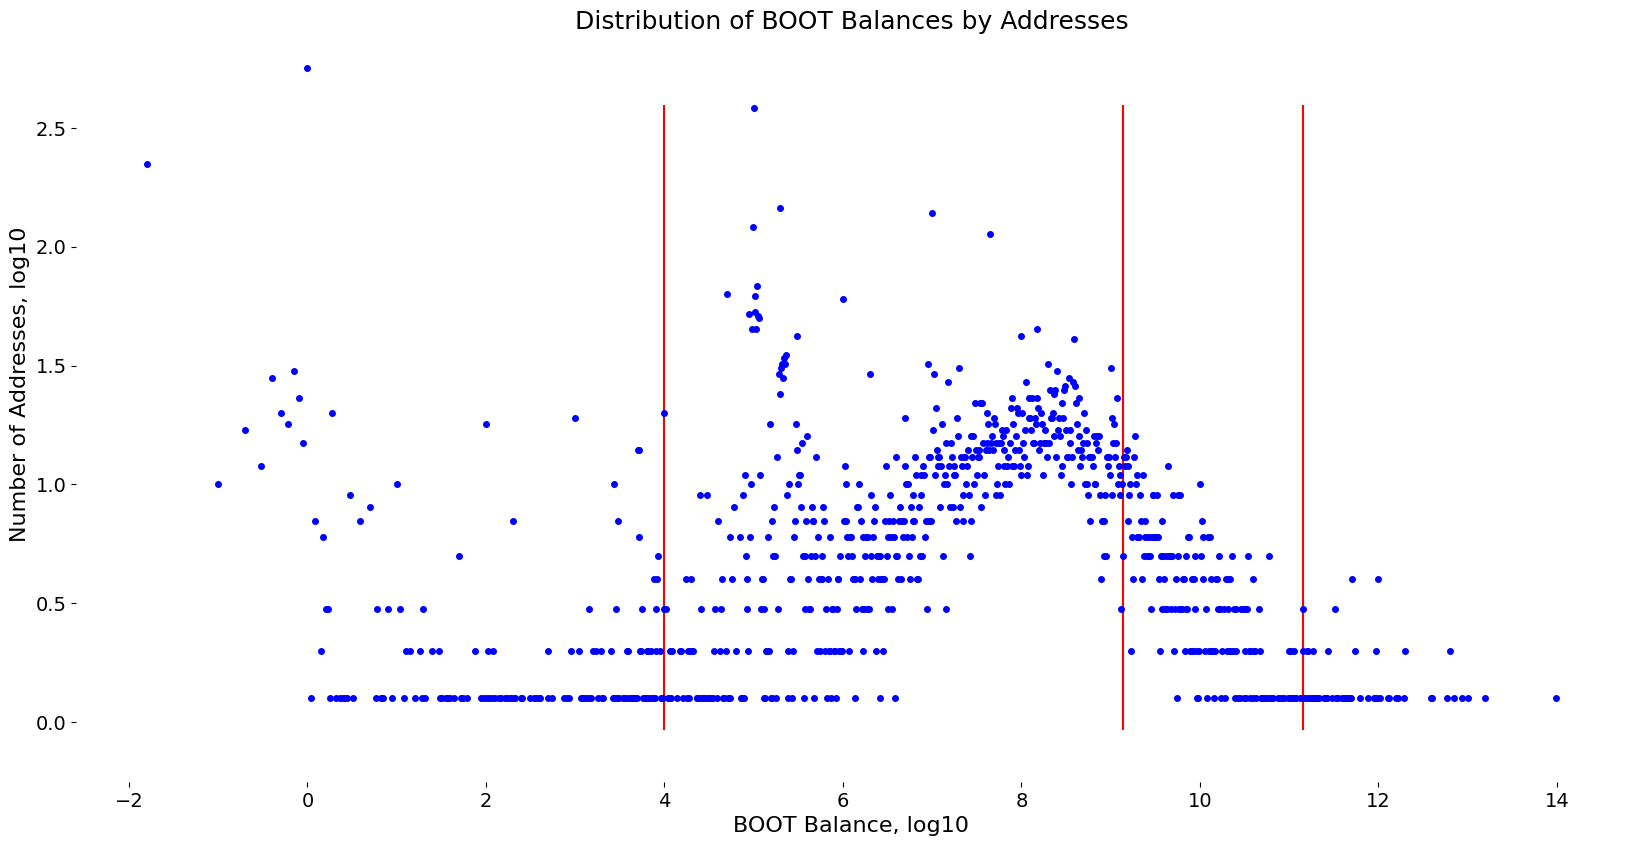

In [5]:
boot_balances_df, boot_boundaries = analyze_chain(
    snapshot_url="data/pussy/bostrom_4939850.json",
    coin='boot',
    coin_for_display='BOOT',
    initial_boundary=INITIAL_BOUNDARY_DICT['boot'],
    max_show_value=200_000_000_000_000,
    segment='Bostrom',
    decimals=0)

### Analysis of Grade Boundaries. DMS Owners
DMS balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"30 < DSM Balance <= 2,125","6,129",89.0
2,"2,125 < DSM Balance <= 142,856",690,10.0
3,"142,856 < DSM Balance",69,1.0


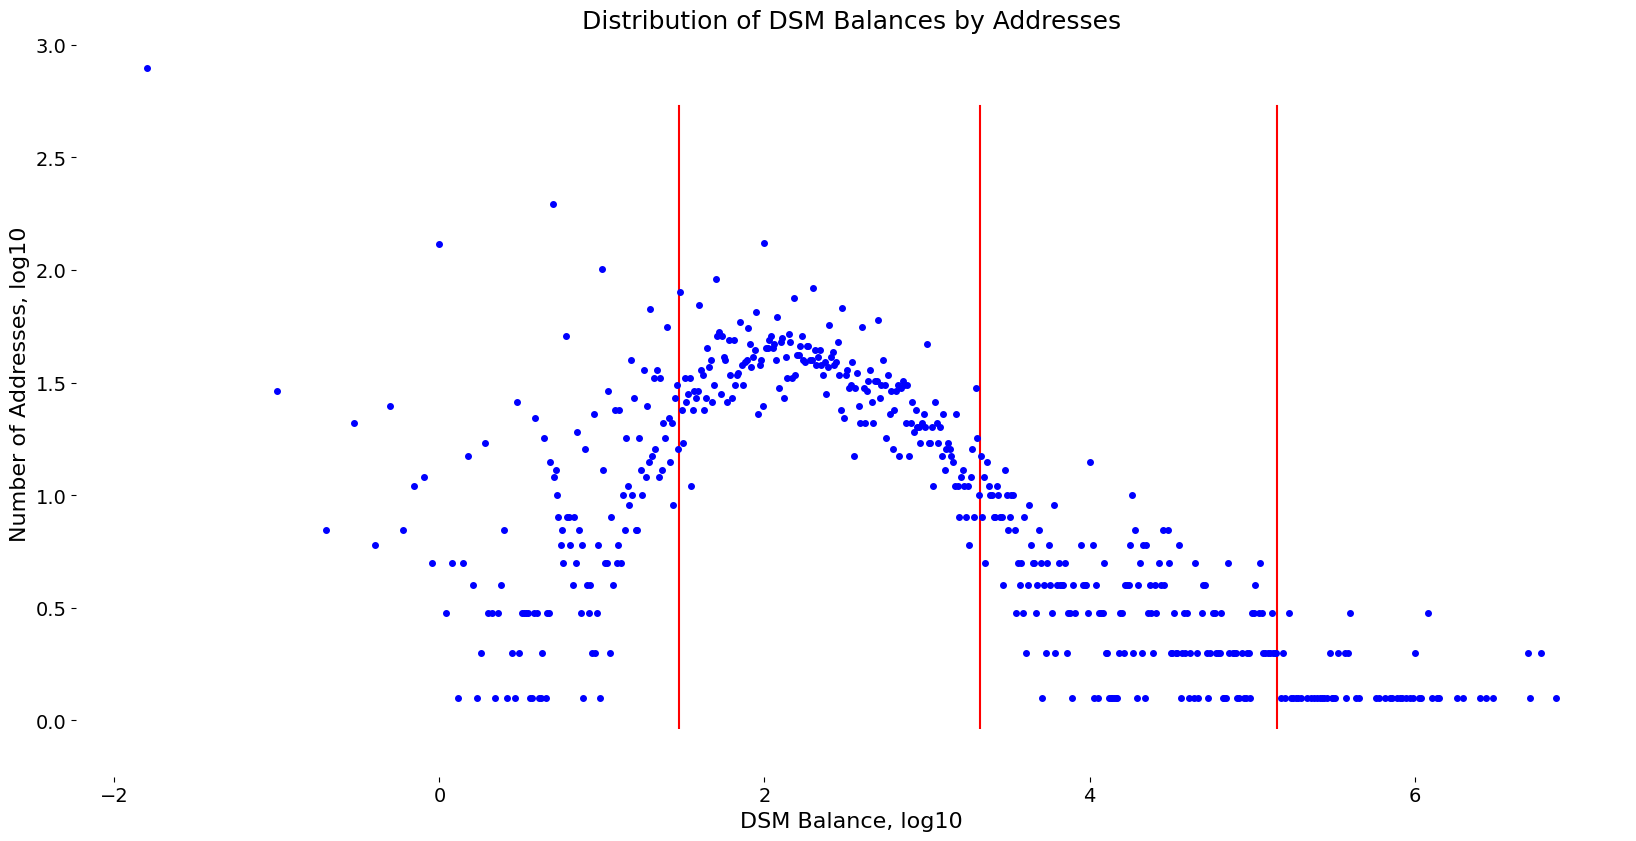

In [6]:
dsm_balances_df, dsm_boundaries = analyze_chain(
    snapshot_url="data/pussy/desmos_6121401.json",
    coin='udsm',
    coin_for_display='DSM',
    initial_boundary=INITIAL_BOUNDARY_DICT['dsm'],
    max_show_value=1_000_000_000_000,
    segment='Desmos')

### Analysis of Grade Boundaries. GRAV Owners
GRAV balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"100 < GRAV Balance <= 14,240","5,198",89.0
2,"14,240 < GRAV Balance <= 930,754",584,10.0
3,"930,754 < GRAV Balance",58,1.0


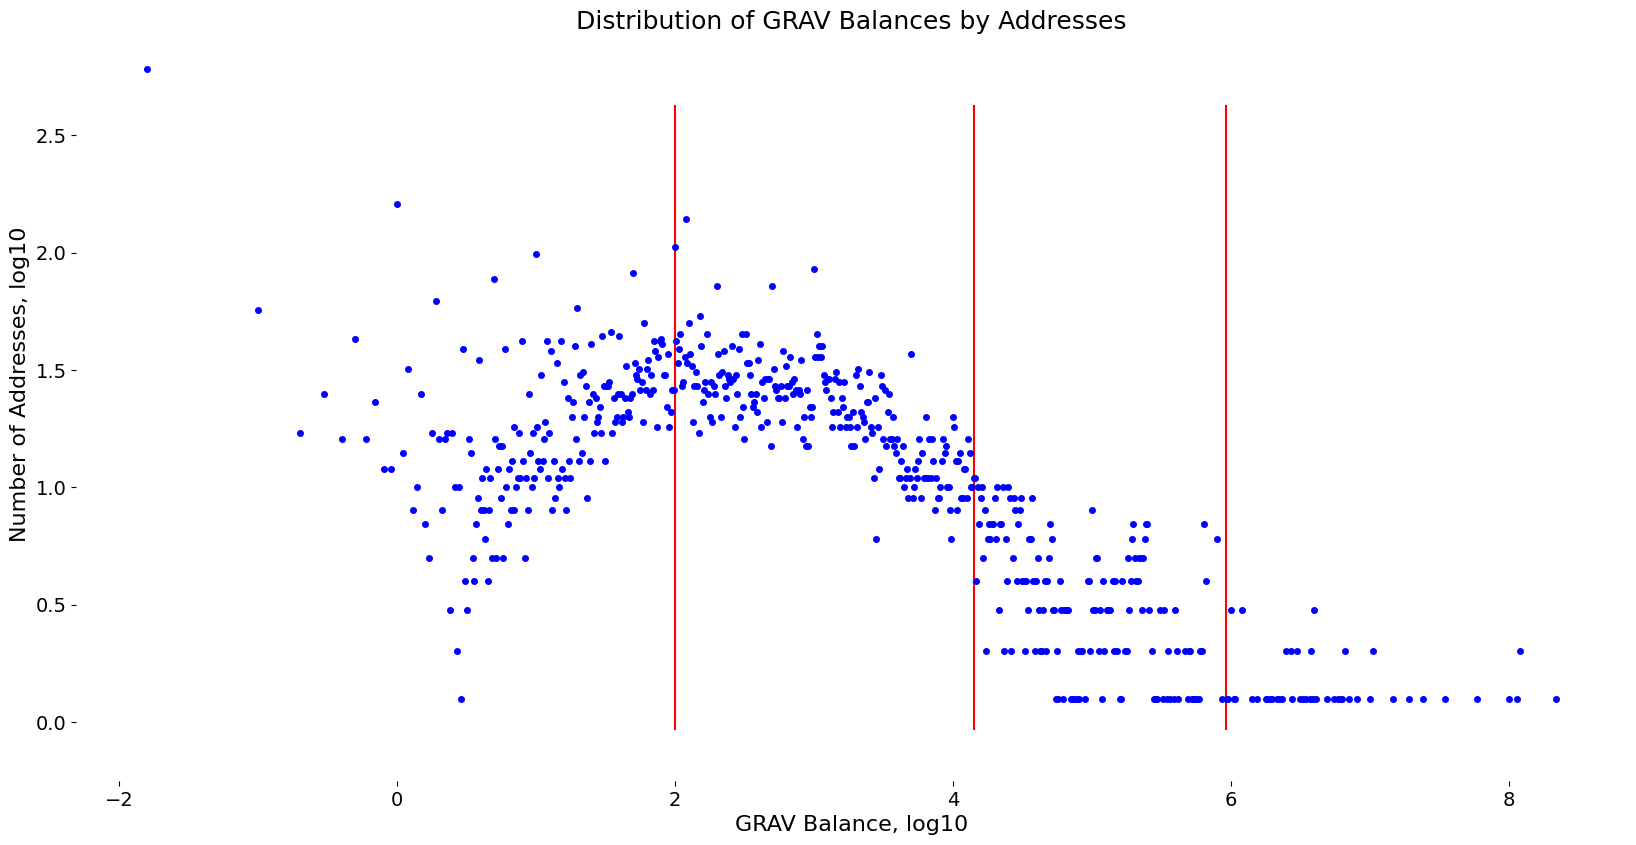

In [7]:
grav_balances_df, grav_boundaries = analyze_chain(
    snapshot_url="data/pussy/gravity_4684716.json",
    coin='ugraviton',
    coin_for_display='GRAV',
    initial_boundary=INITIAL_BOUNDARY_DICT['graviton'],
    max_show_value=1_000_000_000_000,
    segment='Gravity')

### Analysis of Grade Boundaries. JUNO Owners
JUNO balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,0.5 < JUNO Balance <= 201,"94,712",89.1
2,"201 < JUNO Balance <= 4,136","10,567",9.9
3,"4,136 < JUNO Balance","1,064",1.0


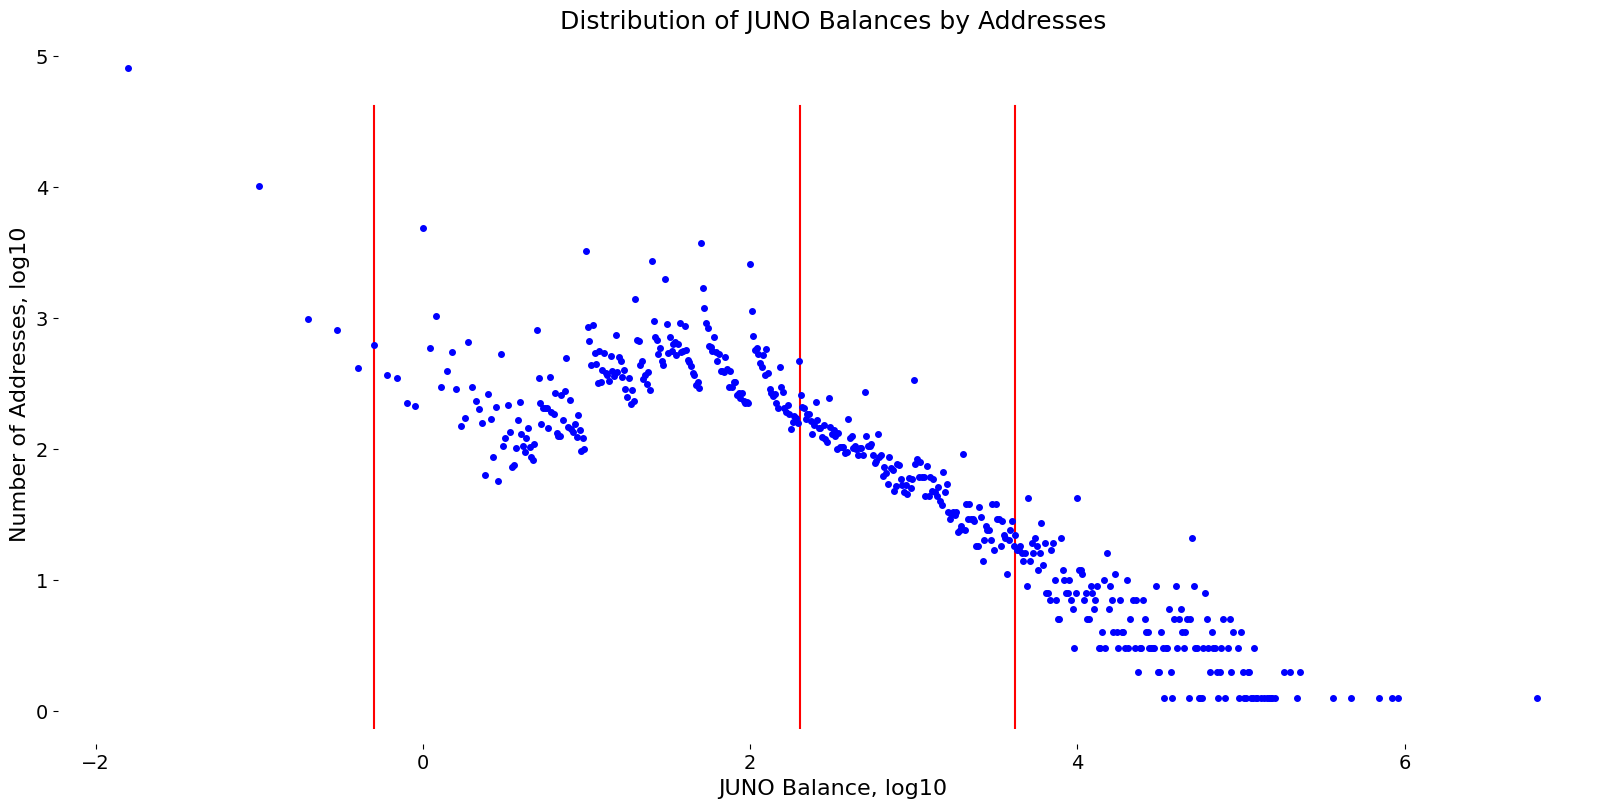

In [8]:
juno_balances_df, juno_boundaries = analyze_chain(
    snapshot_url="data/pussy/juno_5837080.json",
    coin='ujuno',
    coin_for_display='JUNO',
    initial_boundary=INITIAL_BOUNDARY_DICT['juno'],
    max_show_value=100_000_000,
    segment='Juno')

### Analysis of Grade Boundaries. STARS Owners
STARS balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"20 < STARS Balance <= 6,147","36,836",89.0
2,"6,147 < STARS Balance <= 125,126","4,139",10.0
3,"125,126 < STARS Balance",414,1.0


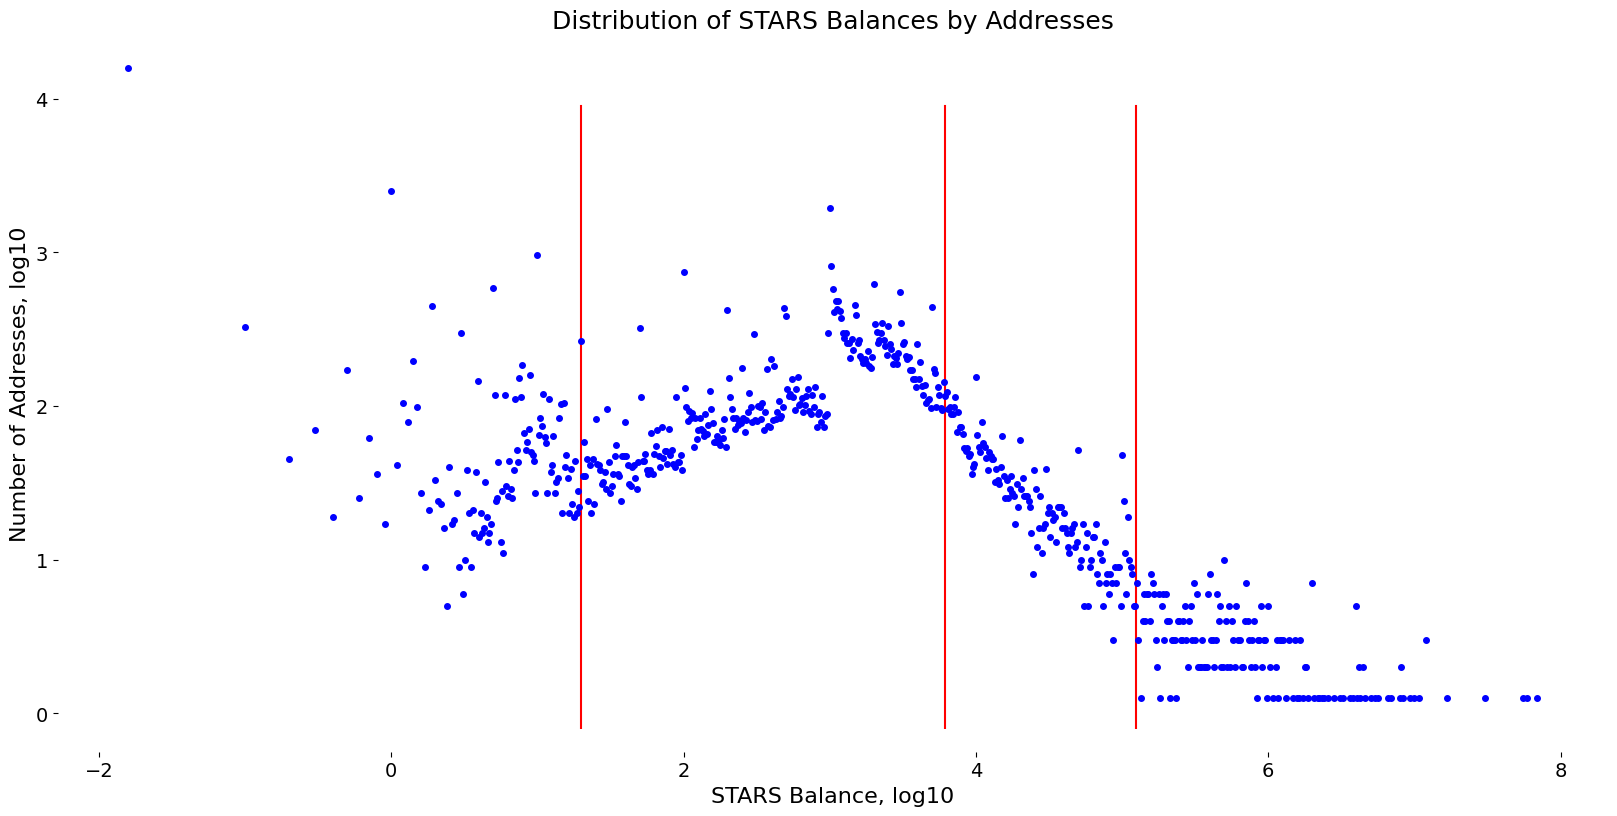

In [9]:
stars_balances_df, stars_boundaries = analyze_chain(
    snapshot_url="data/pussy/stargaze_5720382.json",
    coin='ustars',
    coin_for_display='STARS',
    initial_boundary=INITIAL_BOUNDARY_DICT['stars'],
    max_show_value=100_000_000,
    segment='Stargaze')

### Analysis of Grade Boundaries. UMEE Owners
UMEE balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"100 < UMEE Balance <= 10,571","69,080",89.0
2,"10,571 < UMEE Balance <= 65,552","7,762",10.0
3,"65,552 < UMEE Balance",776,1.0


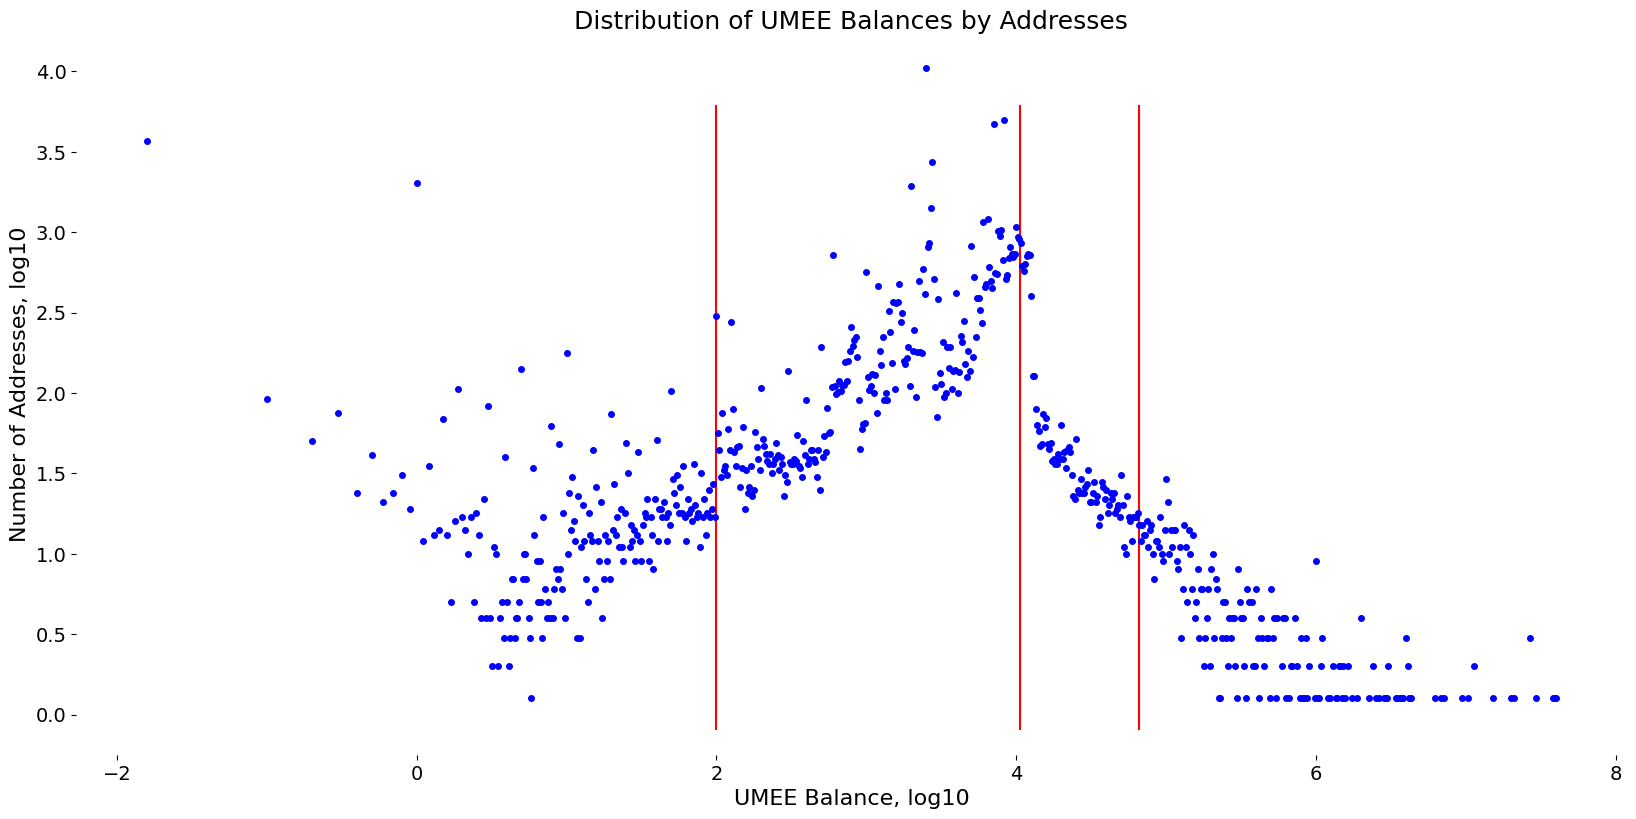

In [10]:
umee_balances_df, umee_boundaries = analyze_chain(
    snapshot_url="data/pussy/umee_3984825.json",
    coin='uumee',
    coin_for_display='UMEE',
    initial_boundary=INITIAL_BOUNDARY_DICT['umee'],
    max_show_value=50_000_000,
    segment='Umee')

### Analysis of Grade Boundaries. Evmos Owners
EVMOS balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,2 < EVMOS Balance <= 760,"97,354",89.0
2,"760 < EVMOS Balance <= 8,865","10,941",10.0
3,"8,865 < EVMOS Balance","1,095",1.0


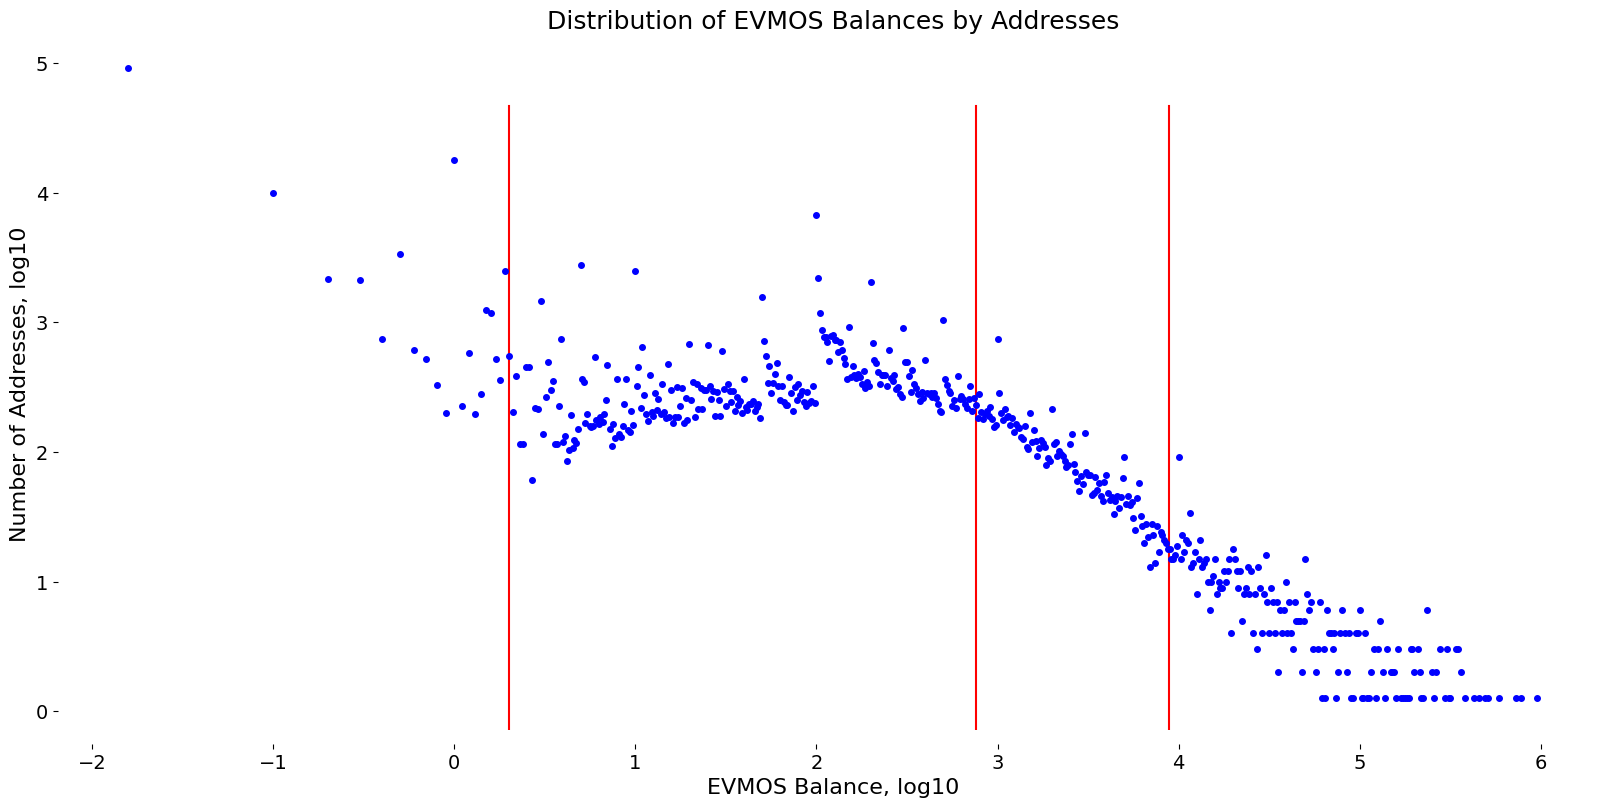

In [11]:
evmos_balances_df, evmos_boundaries = analyze_chain(
    snapshot_url="data/pussy/evmos_7682206.json",
    coin='aevmos',
    coin_for_display='EVMOS',
    initial_boundary=INITIAL_BOUNDARY_DICT['evmos'],
    max_show_value=1_000_000,
    segment='Evmos',
    decimals=18)

### Analysis of Grade Boundaries. Atom Owners
ATOM balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,0.1 < ATOM Balance <= 164,"337,952",89.0
2,"164 < ATOM Balance <= 2,711","38,028",10.0
3,"2,711 < ATOM Balance","3,799",1.0


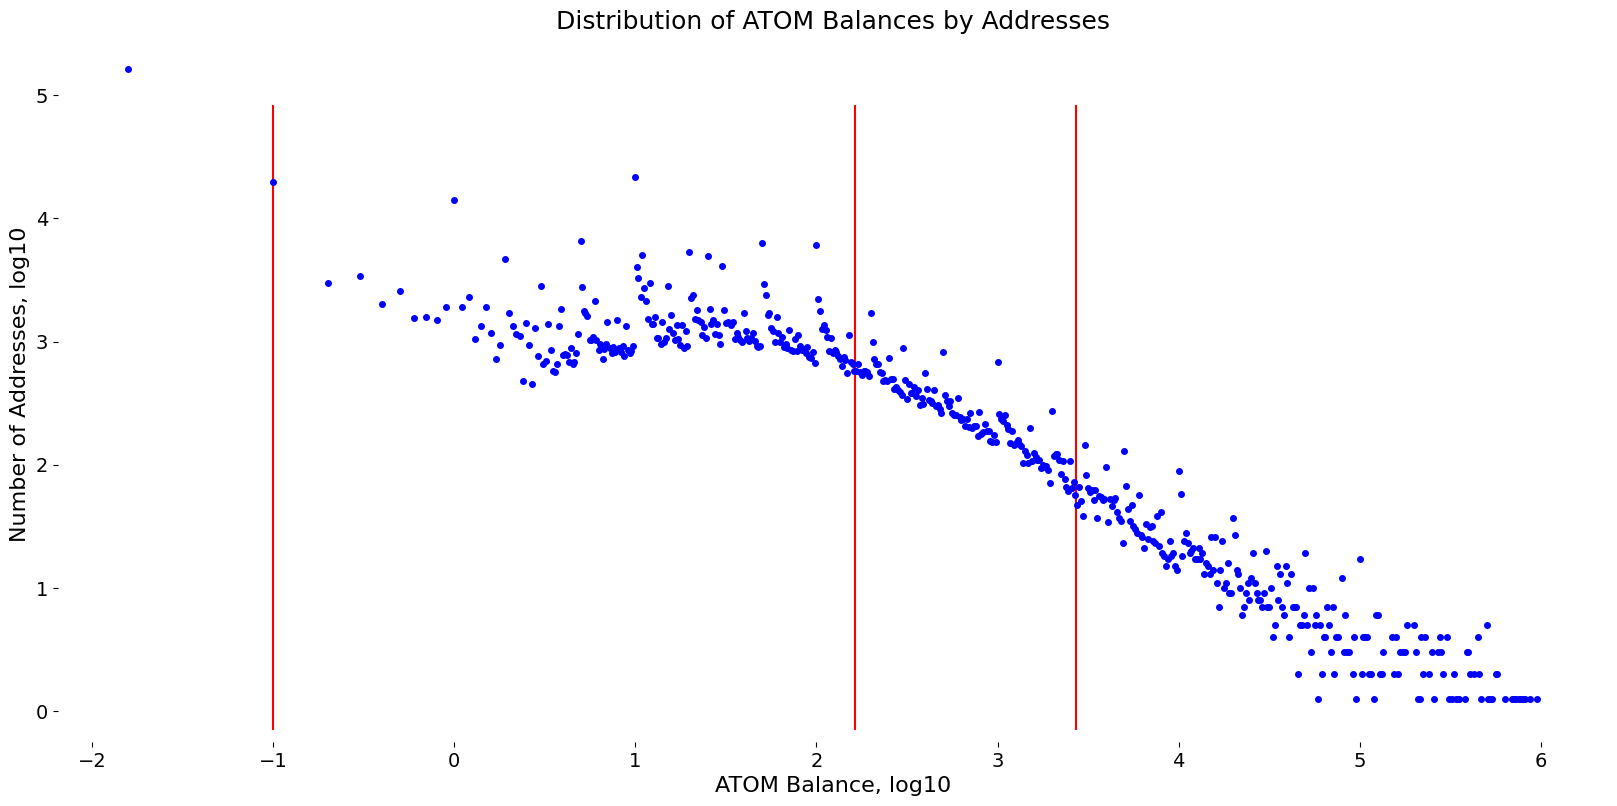

In [12]:
atom_balances_df, atom_boundaries = analyze_chain(
    snapshot_url="data/pussy/cosmoshub_12948921.json",
    coin='uatom',
    coin_for_display='ATOM',
    initial_boundary=INITIAL_BOUNDARY_DICT['atom'],
    max_show_value=1_000_000,
    segment='CosmosHub')

### Analysis of Grade Boundaries. Luna Owners
LUNA balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,1 < LUNA Balance <= 387,"396,382",89.0
2,"387 < LUNA Balance <= 6,397","44,871",10.1
3,"6,397 < LUNA Balance","4,154",0.9


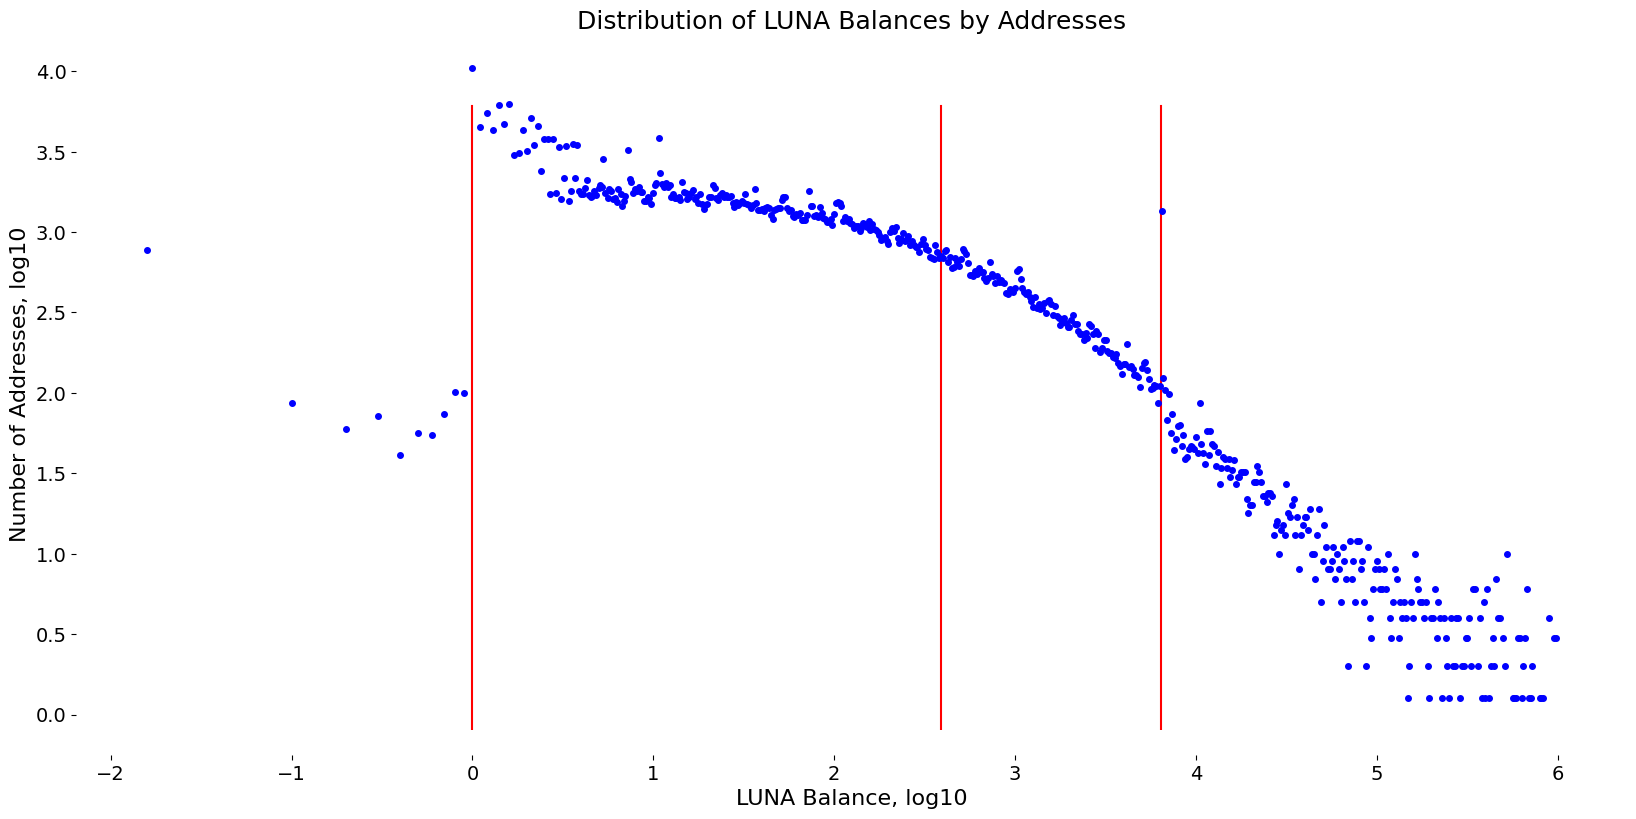

In [13]:
luna_balances_df, luna_boundaries = analyze_chain(
    snapshot_url="data/pussy/terra_2544937.json",
    coin='uluna',
    coin_for_display='LUNA',
    initial_boundary=INITIAL_BOUNDARY_DICT['luna'],
    max_show_value=1_000_000,
    segment='Terra')

### Analysis of Grade Boundaries. Osmo Owners and Liquidity Providers
Amounts of liquidity are calculated based on the balances of pool tokens and the balances of staked pool tokens.
Amounts of liquidity are converted into OSMO based on the pool prices.
OSMO balances are calculated as the sum of available, delegated and unbonding balances.
The ranking is based on the sum of pool liquidity and OSMO balances.

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,1 < OSMO Balance <= 498,"116,719",89.0
2,"498 < OSMO Balance <= 12,619","13,120",10.0
3,"12,619 < OSMO Balance","1,312",1.0


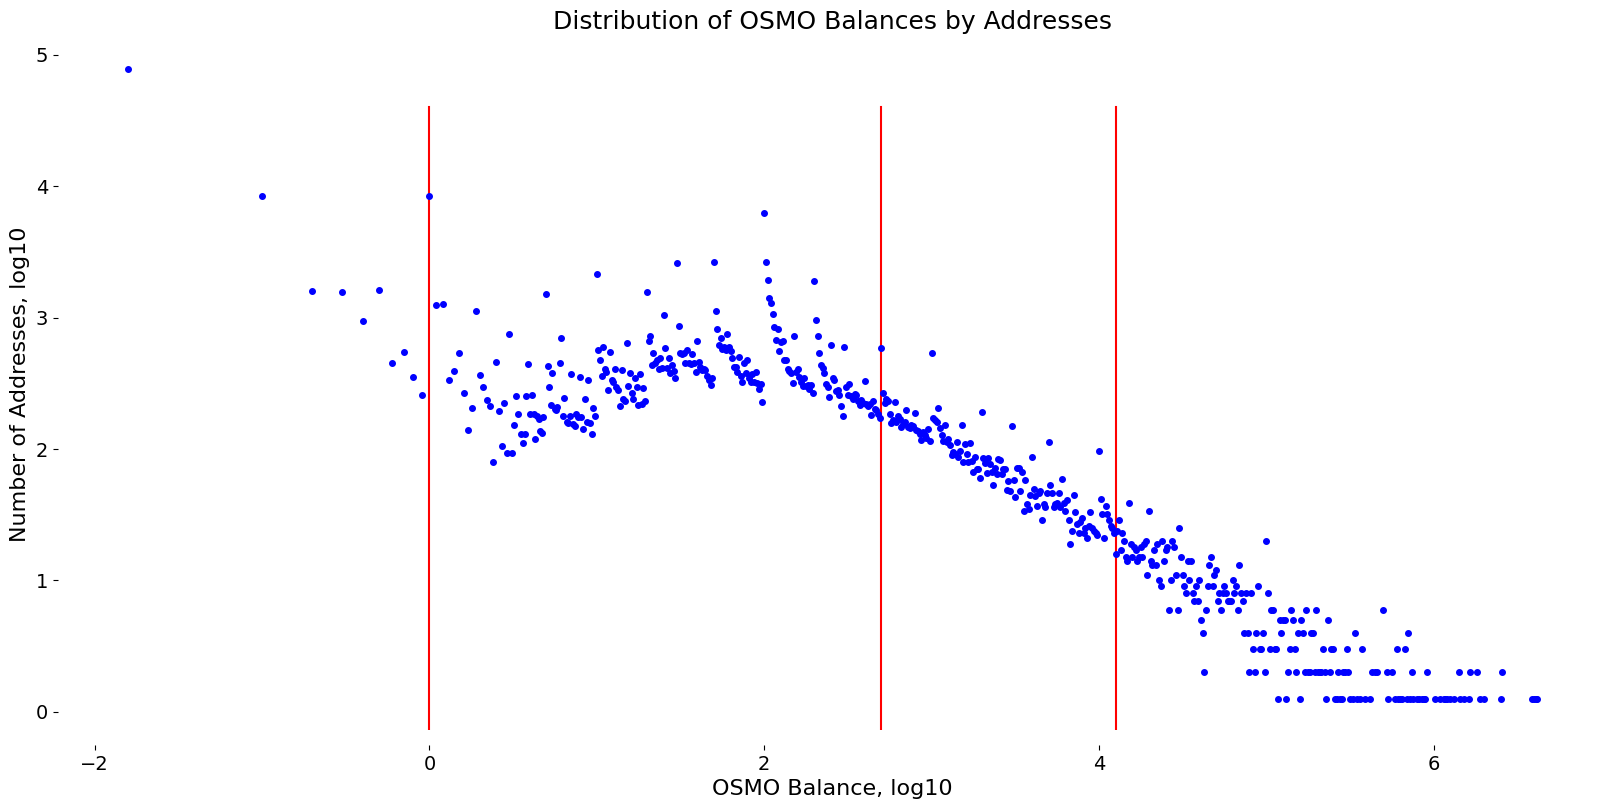

In [14]:
osmo_balances_df, osmo_boundaries = analyze_chain(
    snapshot_url="data/pussy/osmosis_7025000.json",
    coin='uosmo',
    coin_for_display='OSMO',
    initial_boundary=INITIAL_BOUNDARY_DICT['osmo'],
    max_show_value=5_000_000,
    segment='Osmosis')

### Distribution Rules

<table style="text-align: center">
    <thead>
        <tr>
            <th rowspan=2> </th>
            <th colspan=3>Grade</th>
        </tr>
        <tr>
            <th>1</th>
            <th>2</th>
            <th>3</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: left"> BOOT Staking and Liquidity Balance </td>
            <td> > 10,000 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> HUAHUA Staking Balance </td>
            <td> > 10,000 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> ATOM Staking Balance </td>
            <td> > 0.1 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> DSM Staking Balance </td>
            <td> > 30 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> EVMOS Staking Balance </td>
            <td> > 1 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> GRAV Staking Balance </td>
            <td> > 100 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> JUNO Staking Balance </td>
            <td> > 0.5 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> OSMO Staking Balance and Liquidity </td>
            <td> > 1 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> STARS Staking Balance </td>
            <td> > 20 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> LUNA Staking Balance </td>
            <td> > 1 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> UMEE Staking Balance </td>
            <td> > 100 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
    </tbody>
</table>

### Aggregate data

In [15]:
balances_df = pd.concat(
    [atom_balances_df,
     boot_balances_df,
     huahua_balances_df,
     dsm_balances_df,
     grav_balances_df,
     evmos_balances_df,
     osmo_balances_df,
     juno_balances_df,
     stars_balances_df,
     umee_balances_df,
     luna_balances_df])
balances_df = balances_df[balances_df.grade == balances_df.grade]

In [16]:
balances_df[['segment', 'grade']].value_counts()

segment    grade
Terra      1.0      396382
CosmosHub  1.0      337952
Osmosis    1.0      116719
Evmos      1.0       97354
Juno       1.0       94712
Umee       1.0       69080
Terra      2.0       44871
CosmosHub  2.0       38028
Stargaze   1.0       36836
ChiHuaHua  1.0       19627
Osmosis    2.0       13120
Evmos      2.0       10941
Juno       2.0       10567
Umee       2.0        7762
Bostrom    1.0        6256
Desmos     1.0        6129
Gravity    1.0        5198
Terra      3.0        4154
Stargaze   2.0        4139
CosmosHub  3.0        3799
ChiHuaHua  2.0        2205
Osmosis    3.0        1312
Evmos      3.0        1095
Juno       3.0        1064
Umee       3.0         776
Bostrom    2.0         702
Desmos     2.0         690
Gravity    2.0         584
Stargaze   3.0         414
ChiHuaHua  3.0         222
Bostrom    3.0          71
Desmos     3.0          69
Gravity    3.0          58
dtype: int64

In [17]:
balances_df[['segment', 'grade']].value_counts().reset_index().rename(columns={0: 'cnt'}).pivot(index='segment',
                                                                                                columns='grade',
                                                                                                values='cnt')

grade,1.0,2.0,3.0
segment,,,
Bostrom,6256,702,71
ChiHuaHua,19627,2205,222
CosmosHub,337952,38028,3799
Desmos,6129,690,69
Evmos,97354,10941,1095
Gravity,5198,584,58
Juno,94712,10567,1064
Osmosis,116719,13120,1312
Stargaze,36836,4139,414


In [18]:
total_addresses = len(balances_df[['segment', 'grade']])
print(f"Total addresses {total_addresses:>,}")

balances_agg_by_segment_and_grade_df = balances_df[['segment', 'grade']].value_counts().reset_index().rename(
    columns={0: 'cnt'})
balances_agg_by_segment_df = balances_df[['segment']].value_counts().reset_index().rename(columns={0: 'cnt'})
balances_agg_by_grade_df = balances_df[['grade']].value_counts().reset_index().rename(columns={0: 'cnt'})
display(HTML(balances_agg_by_segment_df.to_html(index=False, notebook=True, show_dimensions=False)),
        HTML(balances_agg_by_grade_df.to_html(index=False, notebook=True, show_dimensions=False)))

Total addresses 1,332,888


segment,cnt
Terra,445407
CosmosHub,379779
Osmosis,131151
Evmos,109390
Juno,106343
Umee,77618
Stargaze,41389
ChiHuaHua,22054
Bostrom,7029
Desmos,6888


grade,cnt
1.0,1186245
2.0,133609
3.0,13034


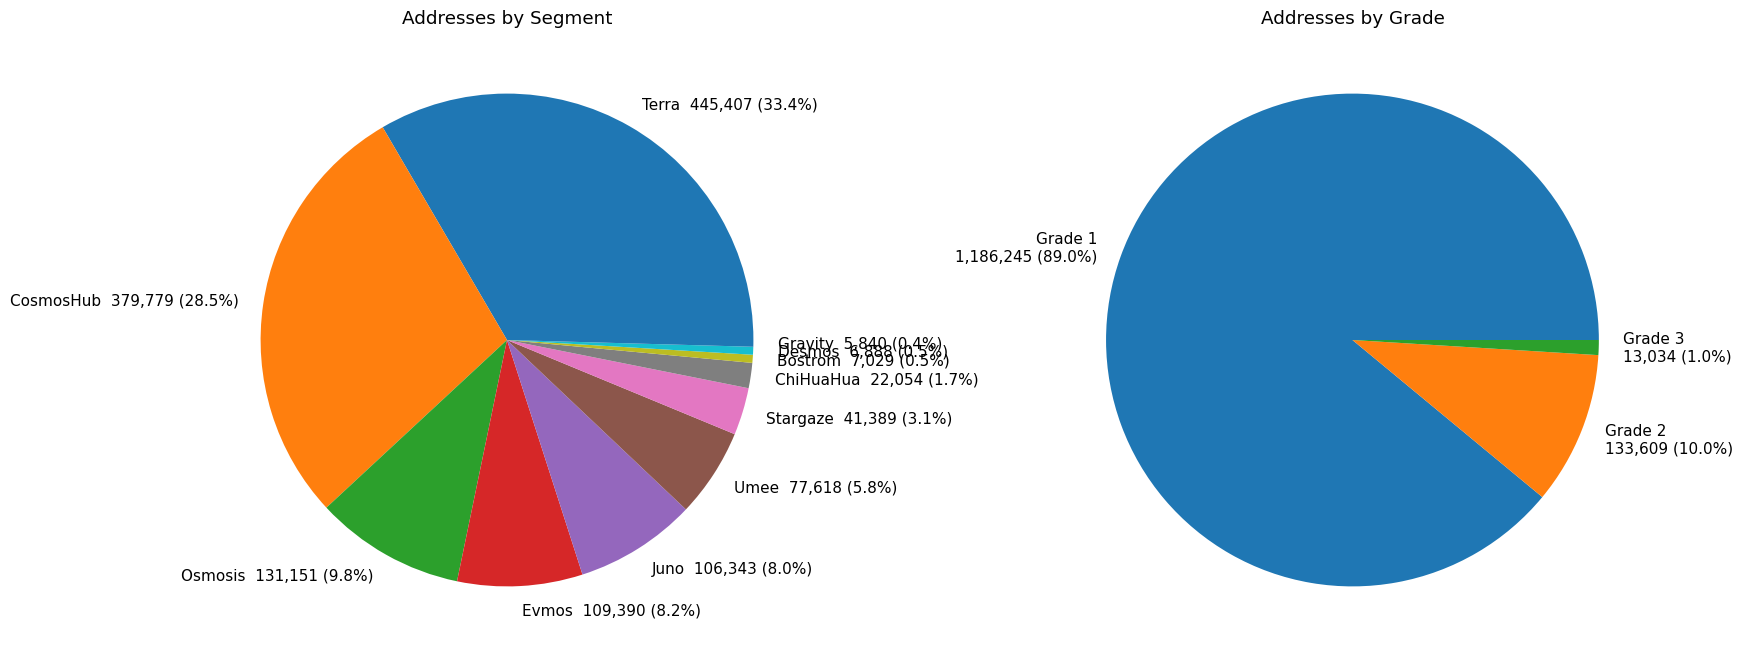

In [19]:
mpl.rcParams['figure.figsize'] = (20.0, 8.0)
plt.rcParams.update({'font.size': 11})

fig, [ax1, ax2] = plt.subplots(ncols=2)

segment_labels = [f'{row.segment}  {row.cnt:>,.0f} ({row.cnt / total_addresses:.1%})' for _, row in
                  balances_agg_by_segment_df.iterrows()]
grade_labels = [f'Grade {int(row.grade)}\n{row.cnt:>,.0f} ({row.cnt / total_addresses:.1%})' for _, row in
                balances_agg_by_grade_df.iterrows()]

ax1.pie(balances_agg_by_segment_df.cnt, labels=segment_labels)
ax1.set_title(label='Addresses by Segment')

ax2.pie(balances_agg_by_grade_df.cnt, labels=grade_labels)
ax2.set_title(label='Addresses by Grade')

plt.show()

## Gift Distribution

In [20]:
gift_size_for_other_networks = TOTAL_GIFT_SIZE - sum(GIFT_PER_SEGMENT.values())
addresses_cnt_in_other_networks = sum(
    balances_agg_by_segment_df[~balances_agg_by_segment_df.segment.isin(GIFT_PER_SEGMENT.keys())].cnt)
addresses_cnt_in_other_networks_by_grade_dict = balances_df[
    ~balances_df.segment.isin(GIFT_PER_SEGMENT.keys())].value_counts('grade').to_dict()
print(f'Total Gift Size: {TOTAL_GIFT_SIZE}\n')
print('\n'.join(f'{k}: {v}' for k, v in GIFT_PER_SEGMENT.items()))
print(f'Gift for other networks: {gift_size_for_other_networks}')

Total Gift Size: 9.5e+17

Bostrom: 1e+17
Desmos: 1e+17
Gift for other networks: 7.5e+17


In [21]:
balances_agg_by_segment_df.loc[:, 'share_of_addresses'] = balances_agg_by_segment_df.cnt / sum(
    balances_agg_by_segment_df.cnt)

for grade in range(1, 4):
    balances_agg_by_segment_df.loc[:, f'cnt_grade_{grade}'] = balances_agg_by_segment_df.apply(
        lambda row: balances_agg_by_segment_and_grade_df[
            (balances_agg_by_segment_and_grade_df.segment == row.segment) & (
                    balances_agg_by_segment_and_grade_df.grade == grade)].cnt.values[0],
        axis=1)
    balances_agg_by_segment_df.loc[:, f'gift_per_address_grade_{grade}'] = balances_agg_by_segment_df.apply(
        lambda row: GIFT_PER_SEGMENT[row.segment] / 3 / row[
            f'cnt_grade_{grade}'] if row.segment in GIFT_PER_SEGMENT.keys() else gift_size_for_other_networks / 3 /
                                                                                 addresses_cnt_in_other_networks_by_grade_dict[
                                                                                     float(grade)],
        axis=1)

balances_agg_by_segment_df.loc[:, 'gift_amount'] = balances_agg_by_segment_df.apply(
    lambda row: GIFT_PER_SEGMENT[
        row.segment] if row.segment in GIFT_PER_SEGMENT.keys() else sum(
        [row[f'cnt_grade_{_grade}'] * row[f'gift_per_address_grade_{_grade}'] for _grade in range(1, 4)]),
    axis=1)
balances_agg_by_segment_df.loc[:, 'gift_per_address_avg'] = balances_agg_by_segment_df.apply(
    lambda row: GIFT_PER_SEGMENT[
                    row.segment] / row.cnt if row.segment in GIFT_PER_SEGMENT.keys() else row.gift_amount / row.cnt,
    axis=1)

display(HTML(balances_agg_by_segment_df.to_html(index=False, notebook=True, show_dimensions=False)))

segment,cnt,share_of_addresses,cnt_grade_1,gift_per_address_grade_1,cnt_grade_2,gift_per_address_grade_2,cnt_grade_3,gift_per_address_grade_3,gift_amount,gift_per_address_avg
Terra,445407,0.334167,396382,2.129726e+11,44871,1.890831e+12,4154,1.938886e+13,2.498033e+17,5.608428e+11
CosmosHub,379779,0.284929,337952,2.129726e+11,38028,1.890831e+12,3799,1.938886e+13,2.175373e+17,5.727998e+11
Osmosis,131151,0.098396,116719,2.129726e+11,13120,1.890831e+12,1312,1.938886e+13,7.510384e+16,5.726517e+11
Evmos,109390,0.082070,97354,2.129726e+11,10941,1.890831e+12,1095,1.938886e+13,6.265212e+16,5.727408e+11
Juno,106343,0.079784,94712,2.129726e+11,10567,1.890831e+12,1064,1.938886e+13,6.078122e+16,5.715583e+11
Umee,77618,0.058233,69080,2.129726e+11,7762,1.890831e+12,776,1.938886e+13,4.443453e+16,5.724772e+11
Stargaze,41389,0.031052,36836,2.129726e+11,4139,1.890831e+12,414,1.938886e+13,2.369820e+16,5.725723e+11
ChiHuaHua,22054,0.016546,19627,2.129726e+11,2205,1.890831e+12,222,1.938886e+13,1.265362e+16,5.737564e+11
Bostrom,7029,0.005274,6256,5.328218e+12,702,4.748338e+13,71,4.694836e+14,1.000000e+17,1.422677e+13
Desmos,6888,0.005168,6129,5.438625e+12,690,4.830918e+13,69,4.830918e+14,1.000000e+17,1.451800e+13
